# Tugas 3
Achmad Khosyi' Assajjad Ramandanta
5025211007
- Segmentation
    - Laplacian of Gaussian (LoG)
    - Thresholding
- Morphology
    - Boundary Extraction
    - Reconstruction

### Import Library

In [22]:
import os
import cv2
from PIL import Image, ImageFilter
from scipy.ndimage import gaussian_laplace
import numpy as np
import matplotlib.pyplot as plt
import shutil

### Create Directory

In [ ]:
def create_directory(path):
    if not os.path.exists(path):
        os.makedirs(path)

base_dir = "."

directories = [
    "Original",
    "Output/Grayed",
    "Output/Laplacian_of_Gaussian",
    "Output/Thresholding/GlobalThresholding",
    "Output/Thresholding/Otsu",
    "Output/Thresholding/AdaptiveThresholding",
    "Output/Morphology/BoundaryExtraction",
    "Output/Morphology/Reconstruction"
]

for directory in directories:
    create_directory(os.path.join(base_dir, directory))

### Import Picture

### Local
Run this if you are on local

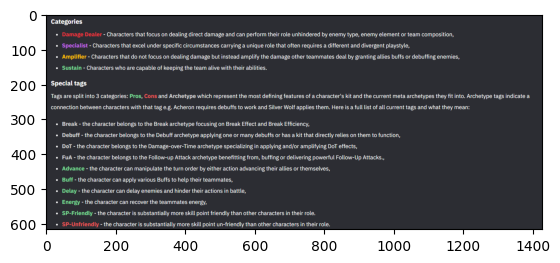

In [40]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Import Image
def import_image():
    Tk().withdraw()
    img_path = askopenfilename(title="Select an image", filetypes=[("Image files", "*.jpg;*.jpeg;*.png")])
    
    if img_path:
        shutil.copy(img_path, 'Original')
        return img_path
    else:
        print("No image selected.")
        return None
    
# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        plt.show()
    else:
        print("No image to display.")
    
image_path = import_image()
display_image(image_path)

### Google Colab
Run this if you are on google colab

In [ ]:
from google.colab import files

# Import Image
def import_image_colab():
    uploaded = files.upload()
    
    if uploaded:
        img_path = list(uploaded.keys())[0]
        
        if not os.path.exists('Original'):
            os.makedirs('Original')
        shutil.move(img_path, os.path.join('Original', img_path))
        
        return os.path.join('Original', img_path)
    else:
        print("No image uploaded.")
        return None

# Display Image
def display_image(image_path):
    if image_path:
        img = Image.open(image_path)
        plt.imshow(img)
        # plt.axis('off')
        plt.show()
    else:
        print("No image to display.")

image_path = import_image_colab()
display_image(image_path)

### Turn The Image Into Gray Scale

Grayscale image saved to: Output/Grayed\hsrprydwen_grayed.png


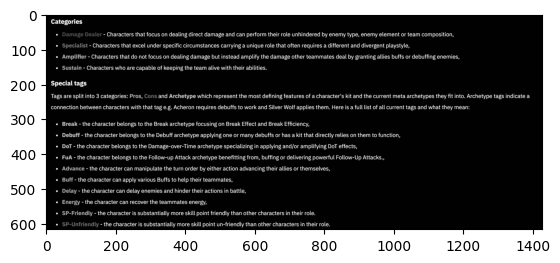

In [ ]:
# Gray Scaling
def convert_to_grayscale(image_path):
    img = Image.open(image_path).convert("L")
    return img

def save_grayscale_image(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitexSt(filename)
    gray_img = convert_to_grayscale(image_path)
    
    new_filename = f"{name}_grayed{ext}"
    new_path = os.path.join("Output/Grayed", new_filename)
    
    gray_img.save(new_path)
    print(f"Grayscale image saved to: {new_path}")

save_grayscale_image(image_path)

# Display
def display_grayscale_image(image_path):
    img = Image.open(image_path)
    
    plt.imshow(img, cmap="gray")
    # plt.axis('off')
    plt.show()

display_grayscale_image(os.path.join("Output/Grayed", f"{os.path.splitext(os.path.basename(image_path))[0]}_grayed{os.path.splitext(image_path)[1]}"))


## Laplacian of Gaussian (LoG)

### Choose Image

In [13]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

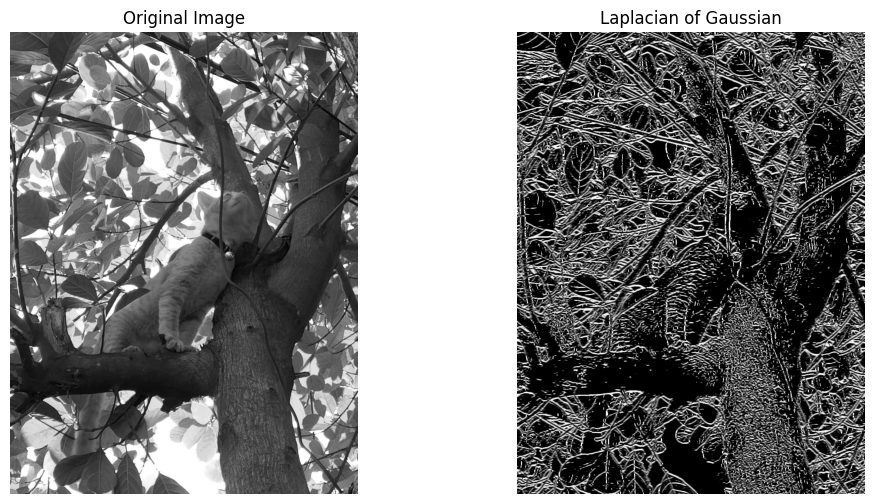

In [ ]:
# Laplacian of Gaussian (LoG)
def apply_log(image, sigma):
    img_array = np.asarray(image)
    log_result = gaussian_laplace(img_array, sigma=sigma)
    return log_result

def display_and_save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def process_and_display_log(image_path, sigma):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = np.array(Image.open(image_path))
    log_result = apply_log(image, sigma=sigma)
    log_normalized = (log_result - log_result.min()) / (log_result.max() - log_result.min())

    output_path = os.path.join("Output/Laplacian_of_Gaussian", f"{name}_LoG.jpg")

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(log_normalized, cmap="gray")
    axes[1].set_title(f"Laplacian of Gaussian")
    axes[1].axis('off')

    plt.show()

    display_and_save(log_normalized, output_path)

process_and_display_log(input_path, sigma=1.5)

## Thresholding

### Choose Image

In [ ]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

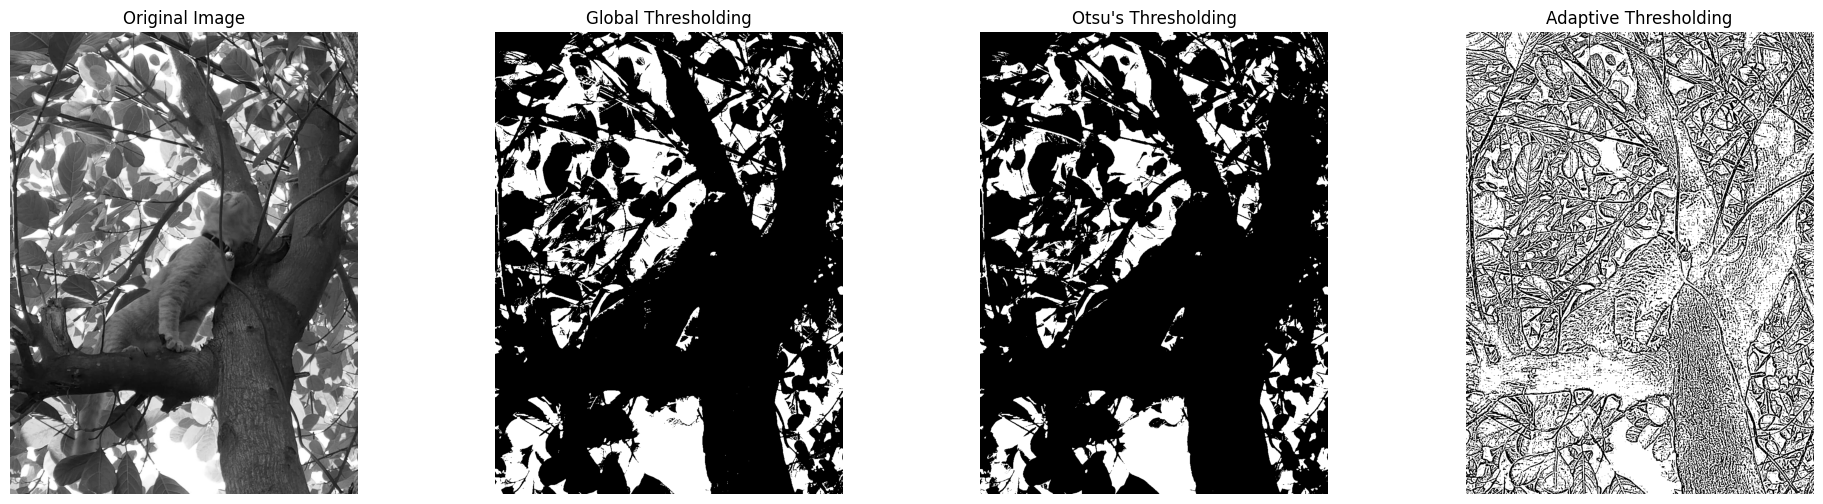

In [ ]:
def apply_global_thresholding(image, threshold=127):
    _, binary = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY)
    return binary

def apply_otsu_thresholding(image):
    _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return binary

def apply_adaptive_thresholding(image, block_size=11, C=2):
    binary = cv2.adaptiveThreshold(
        image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, block_size, C
    )
    return binary

def display_and_save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def process_and_display_thresholding(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = np.array(Image.open(image_path))  # Load image as numpy array

    global_thresh = apply_global_thresholding(image)
    otsu_thresh = apply_otsu_thresholding(image)
    adaptive_thresh = apply_adaptive_thresholding(image)

    output_path_global = os.path.join("Output/Thresholding/GlobalThresholding", f"{name}_Global.jpg")
    output_path_otsu = os.path.join("Output/Thresholding/Otsu", f"{name}_Otsu.jpg")
    output_path_adaptive = os.path.join("Output/Thresholding/AdaptiveThresholding", f"{name}_Adaptive.jpg")

    display_and_save(global_thresh, output_path_global)
    display_and_save(otsu_thresh, output_path_otsu)
    display_and_save(adaptive_thresh, output_path_adaptive)

    fig, axes = plt.subplots(1, 4, figsize=(24, 6))
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(global_thresh, cmap="gray")
    axes[1].set_title("Global Thresholding")
    axes[1].axis('off')

    axes[2].imshow(otsu_thresh, cmap="gray")
    axes[2].set_title("Otsu's Thresholding")
    axes[2].axis('off')

    axes[3].imshow(adaptive_thresh, cmap="gray")
    axes[3].set_title("Adaptive Thresholding")
    axes[3].axis('off')

    plt.show()

process_and_display_thresholding(input_path)

## Boundary Extraction

### Choose Image

In [46]:
selected_filename = "mycat_grayed.jpg"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

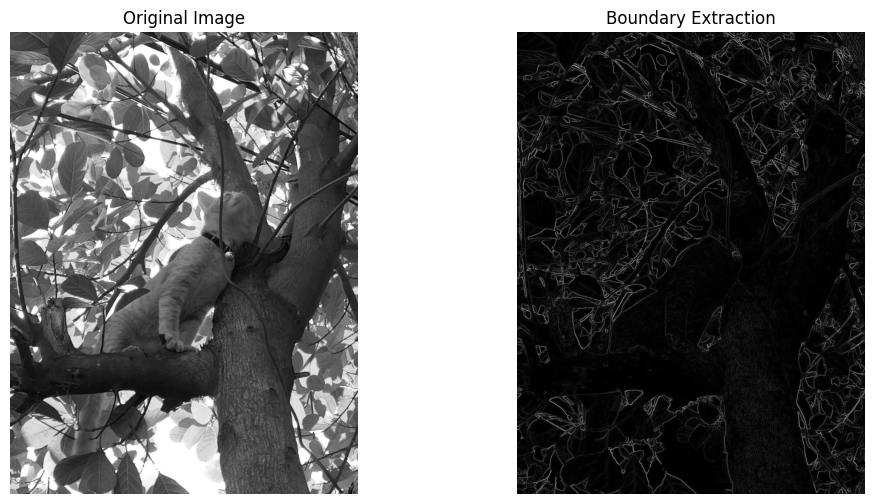

In [ ]:
# Boundary Extraction
def apply_boundary_extraction(image):
    dilated = cv2.dilate(image, np.ones((3, 3), np.uint8), iterations=1)
    boundary = dilated - image
    return boundary

def display_and_save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def process_and_display_boundary(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = np.array(Image.open(image_path))
    boundary = apply_boundary_extraction(image)

    output_path_boundary = os.path.join("Output/Morphology/BoundaryExtraction", f"{name}_Boundary.jpg")
    display_and_save(boundary, output_path_boundary)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(boundary, cmap="gray")
    axes[1].set_title("Boundary Extraction")
    axes[1].axis('off')

    plt.show()

process_and_display_boundary(input_path)

## Reconstruction

### Choose Image

In [55]:
selected_filename = "hsrprydwen_grayed.png"  
input_path = os.path.join("Output/Grayed", selected_filename)

### Calculation & Display The Result

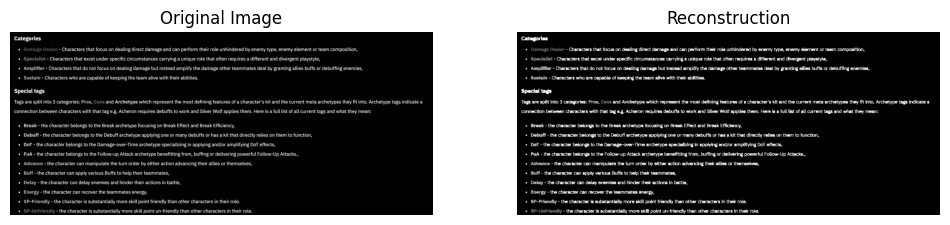

In [ ]:
# Reconstruction Rekonstruksi
def apply_reconstruction(image, mask):
    kernel = np.ones((3, 3), np.uint8)
    dilated = cv2.dilate(image, kernel, iterations=1)
    reconstructed = cv2.erode(dilated, kernel, iterations=1)
    return reconstructed

def display_and_save(image_array, output_path):
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()

def process_and_display_reconstruction(image_path):
    filename = os.path.basename(image_path)
    name, ext = os.path.splitext(filename)

    image = np.array(Image.open(image_path))
    boundary = apply_boundary_extraction(image)

    reconstructed = apply_reconstruction(image, boundary)

    output_path_reconstruction = os.path.join("Output/Morphology/Reconstruction", f"{name}_Reconstruction.jpg")
    display_and_save(reconstructed, output_path_reconstruction)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Original Image")
    axes[0].axis('off')

    axes[1].imshow(reconstructed, cmap="gray")
    axes[1].set_title("Reconstruction")
    axes[1].axis('off')

    plt.show()

process_and_display_reconstruction(input_path)